In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [91]:
df = pd.read_csv('df.csv')

In [92]:
df.head()

,track_id,track_title,track_genre_top,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
0,2,Food,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
1,3,Electric Ave,Hip-Hop,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
2,5,This World,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
3,134,Street Music,Hip-Hop,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705
4,139,CandyAss,Folk,0.106550,0.260911,0.607067,0.835087,0.223676,0.030569,196.961,...,-3.078667,12.411567,0.270802,0.272700,0.025242,0.06404,2.43669,2.37265,3.897095,37.866043


In [93]:
X,y = df.iloc[:,3:],df.iloc[:,2]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
#KNN

In [96]:
KNN = KNeighborsClassifier()

In [97]:
parameters = {"n_neighbors" : [3,6,10,15]}

In [98]:
clf = GridSearchCV(estimator=KNN, param_grid=parameters, scoring = 'accuracy', verbose = 1)

In [99]:
clf.fit(X_train,y_train) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   43.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 6, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [100]:
clf.best_score_,clf.best_estimator_

(0.62385844748858443,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=15, p=2,
            weights='uniform'))

In [101]:
KNN = clf.best_estimator_

In [102]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [103]:
y_pred = KNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.63359073359073359

In [104]:
KNN_pred = pd.crosstab(y_test, y_pred, rownames=['Actual Genres'], colnames=['Predicted Genres'])
KNN_pred

In [105]:
#RandomForest

In [106]:
RFC = RandomForestClassifier()

In [107]:
parameters = {"n_estimators" : [10,20,30,40], "max_depth" : [10,20,30,40]}

In [108]:
clf = GridSearchCV(estimator=RFC, param_grid=parameters, scoring = 'accuracy', verbose = 1)

In [109]:
clf.fit(X_train,y_train)    

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40], 'max_depth': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [110]:
clf.best_score_,clf.best_estimator_

(0.77720700152207001,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=30, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

In [111]:
RFC = clf.best_estimator_

In [112]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
y_pred = RFC.predict(X_test)

In [114]:
accuracy_score(y_test, y_pred)

0.78301158301158302

In [115]:
RFC_pred = pd.crosstab(y_test, y_pred, rownames=['Actual Genres'], colnames=['Predicted Genres'])
RFC_pred

In [ ]:
#GradientBoosting

In [124]:
from sklearn.ensemble import GradientBoostingClassifier

In [150]:
GBC = GradientBoostingClassifier(min_samples_split = 100, min_samples_leaf = 30, max_depth = 5, 
                                 max_features = 'sqrt', subsample = 0.8)

In [151]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=100,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

In [152]:
y_pred = GBC.predict(X_test)

In [153]:
accuracy_score(y_test,y_pred)

0.81389961389961385

In [154]:
GBC_pred = pd.crosstab(y_test, y_pred, rownames=['Actual Genres'], colnames=['Predicted Genres'])
GBC_pred

Predicted Genres,Electronic,Folk,Hip-Hop,Rock
Actual Genres,,,,
Electronic,555,17,18,100
Folk,16,166,4,109
Hip-Hop,51,1,220,32
Rock,62,58,14,1167


In [155]:
GBC_pred.apply(lambda r: r/r.sum(), axis=1).round(2)

Predicted Genres,Electronic,Folk,Hip-Hop,Rock
Actual Genres,,,,
Electronic,0.80,0.02,0.03,0.14
Folk,0.05,0.56,0.01,0.37
Hip-Hop,0.17,0.00,0.72,0.11
Rock,0.05,0.04,0.01,0.90


In [116]:
import seaborn as sns

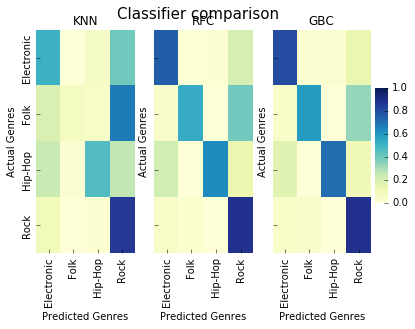

In [137]:
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91,.3,.03,.4])
sns.heatmap(KNN_pred.apply(lambda r: r/r.sum(), axis=1),ax=ax0,cbar=True,vmin=0,vmax=1,cbar_ax = cbar_ax, cmap="YlGnBu")
ax0.set_title('KNN')
sns.heatmap(RFC_pred.apply(lambda r: r/r.sum(), axis=1),ax=ax1,cbar=True,vmin=0,vmax=1,cbar_ax = cbar_ax, cmap="YlGnBu")
ax1.set_title('RFC')
sns.heatmap(GBC_pred.apply(lambda r: r/r.sum(), axis=1),ax=ax2,cbar=True,vmin=0,vmax=1,cbar_ax = cbar_ax, cmap="YlGnBu")
ax2.set_title('GBC')
fig.suptitle('Classifier comparison',fontsize=15)

plt.show()